In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
# Load the datasets
data = pd.read_csv('../DataSet/dataset.csv')
#just_features = pd.read_csv('../just_features.csv')

In [3]:
data.shape

(25000, 10)

In [4]:
data.isnull().sum()

id             0
tipo           0
ano_registo    0
caixa          0
potencia       0
km             0
combustivel    0
marca          0
com_danos      0
preco          0
dtype: int64

In [5]:
data.columns

Index(['id', 'tipo', 'ano_registo', 'caixa', 'potencia', 'km', 'combustivel',
       'marca', 'com_danos', 'preco'],
      dtype='object')

In [6]:
data.head()

,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco
0,26713,limousine,2014,manual,140,40800,gasolina,outra,nao,14200
1,49553,limousine,2013,manual,184,30300,diesel,bmw,nao,25840
2,9007,coupe,2009,manual,177,150900,diesel,bmw,nao,9990
3,21152,compacto,2006,manual,54,150500,gasolina,volkswagen,nao,3250
4,37819,limousine,2015,manual,150,40600,diesel,volkswagen,nao,16939


In [7]:
# Set current year
current_year = 2024

In [8]:
# Tranform ano_registo into car age
data['idade'] = current_year - data['ano_registo']

In [9]:
data.head()

,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco,idade
0,26713,limousine,2014,manual,140,40800,gasolina,outra,nao,14200,10
1,49553,limousine,2013,manual,184,30300,diesel,bmw,nao,25840,11
2,9007,coupe,2009,manual,177,150900,diesel,bmw,nao,9990,15
3,21152,compacto,2006,manual,54,150500,gasolina,volkswagen,nao,3250,18
4,37819,limousine,2015,manual,150,40600,diesel,volkswagen,nao,16939,9


In [10]:
data.drop(['ano_registo'],axis = 1,inplace = True)
#drops the column labelled as "year" and doesnt return a copy as inplace = true. and axis = 1 represents columns

In [11]:
data.head()

,id,tipo,caixa,potencia,km,combustivel,marca,com_danos,preco,idade
0,26713,limousine,manual,140,40800,gasolina,outra,nao,14200,10
1,49553,limousine,manual,184,30300,diesel,bmw,nao,25840,11
2,9007,coupe,manual,177,150900,diesel,bmw,nao,9990,15
3,21152,compacto,manual,54,150500,gasolina,volkswagen,nao,3250,18
4,37819,limousine,manual,150,40600,diesel,volkswagen,nao,16939,9


In [12]:
# Get unique attributes for columns with duplicate values
print(f'tipo -> {data['tipo'].unique()}')
print(f'caixa -> {data['caixa'].unique()}')
print(f'com_danos -> {data['com_danos'].unique()}')
print(f'combustivel -> {data['combustivel'].unique()}')
print(f'marca -> {data['marca'].unique()}')

tipo -> ['limousine' 'coupe' 'compacto' 'kombi' 'carrinha' 'suv' 'cabrio' 'outro']
caixa -> ['manual' 'automatica']
com_danos -> ['nao' 'sim']
combustivel -> ['gasolina' 'diesel' 'outro']
marca -> ['outra' 'bmw' 'volkswagen' 'audi' 'opel' 'ford' 'mercedes_benz' 'fiat'
 'renault' 'peugeot']


In [13]:
data = pd.get_dummies(data, drop_first = True)
#removes multiple columns of the dataset as some column contain the same 
#information because the original column could assume a binary value. 

In [14]:
data.head()

,id,potencia,km,preco,idade,tipo_carrinha,tipo_compacto,tipo_coupe,tipo_kombi,tipo_limousine,...,marca_bmw,marca_fiat,marca_ford,marca_mercedes_benz,marca_opel,marca_outra,marca_peugeot,marca_renault,marca_volkswagen,com_danos_sim
0,26713,140,40800,14200,10,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,49553,184,30300,25840,11,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
2,9007,177,150900,9990,15,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,21152,54,150500,3250,18,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,37819,150,40600,16939,9,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [15]:
data.corr(method ='pearson')
#to find the pairwise correlation of all columns in the dataframe

,id,potencia,km,preco,idade,tipo_carrinha,tipo_compacto,tipo_coupe,tipo_kombi,tipo_limousine,...,marca_bmw,marca_fiat,marca_ford,marca_mercedes_benz,marca_opel,marca_outra,marca_peugeot,marca_renault,marca_volkswagen,com_danos_sim
id,1.000000,0.002946,0.007846,-0.005704,0.006917,-0.001283,-0.002755,-0.004699,0.003909,-0.003942,...,0.003904,0.009577,-0.006088,0.004684,0.002195,-0.005665,0.006293,0.007528,-0.010391,-0.002939
potencia,0.002946,1.000000,-0.004078,0.156160,-0.062869,-0.017423,-0.145778,0.069152,0.036714,0.032162,...,0.088279,-0.041789,-0.033804,0.067769,-0.046839,-0.025725,-0.029703,-0.041105,-0.037580,-0.025337
km,0.007846,-0.004078,1.000000,-0.365155,0.606307,0.054540,-0.129545,-0.022380,0.163150,0.032382,...,0.071402,-0.033573,0.005498,0.053308,0.038483,-0.129483,0.004219,0.014202,0.002179,0.105046
preco,-0.005704,0.156160,-0.365155,1.000000,-0.467621,-0.014605,-0.187191,0.159126,-0.032511,0.008838,...,0.095875,-0.060473,-0.069797,0.076709,-0.104393,0.003042,-0.062488,-0.086936,-0.005458,-0.128556
idade,0.006917,-0.062869,0.606307,-0.467621,1.000000,-0.021015,0.048338,-0.013378,0.010210,0.037064,...,0.002994,0.007049,0.020790,0.033504,0.082160,-0.068652,0.031524,0.066101,-0.029871,0.152290
tipo_carrinha,-0.001283,-0.017423,0.054540,-0.014605,-0.021015,1.000000,-0.182839,-0.080317,-0.181058,-0.210358,...,-0.121075,-0.001561,0.044025,-0.001431,0.061419,-0.023584,-0.026690,0.087184,0.099748,0.016840
tipo_compacto,-0.002755,-0.145778,-0.129545,-0.187191,0.048338,-0.182839,1.000000,-0.125173,-0.282175,-0.327839,...,-0.188027,0.179485,0.053475,-0.164372,0.065708,0.120920,0.076368,0.113690,0.000244,0.031041
tipo_coupe,-0.004699,0.069152,-0.022380,0.159126,-0.013378,-0.080317,-0.125173,1.000000,-0.123954,-0.144013,...,0.061404,-0.026496,-0.032454,0.098897,-0.028021,-0.024501,-0.024229,-0.027997,-0.052305,-0.014246
tipo_kombi,0.003909,0.036714,0.163150,-0.032511,0.010210,-0.181058,-0.282175,-0.123954,1.000000,-0.324646,...,0.032364,-0.065200,0.029969,0.000141,-0.000015,-0.083804,-0.020749,-0.040577,-0.025758,0.026893
tipo_limousine,-0.003942,0.032162,0.032382,0.008838,0.037064,-0.210358,-0.327839,-0.144013,-0.324646,1.000000,...,0.191313,-0.069708,-0.056371,0.083103,-0.050394,-0.097816,-0.074970,-0.083592,0.029693,-0.027310


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
#to display the plot directly below the code cell.

In [17]:
corrmat = data.corr(method='pearson')
corrmat.index

Index(['id', 'potencia', 'km', 'preco', 'idade', 'tipo_carrinha',
       'tipo_compacto', 'tipo_coupe', 'tipo_kombi', 'tipo_limousine',
       'tipo_outro', 'tipo_suv', 'caixa_manual', 'combustivel_gasolina',
       'combustivel_outro', 'marca_bmw', 'marca_fiat', 'marca_ford',
       'marca_mercedes_benz', 'marca_opel', 'marca_outra', 'marca_peugeot',
       'marca_renault', 'marca_volkswagen', 'com_danos_sim'],
      dtype='object')

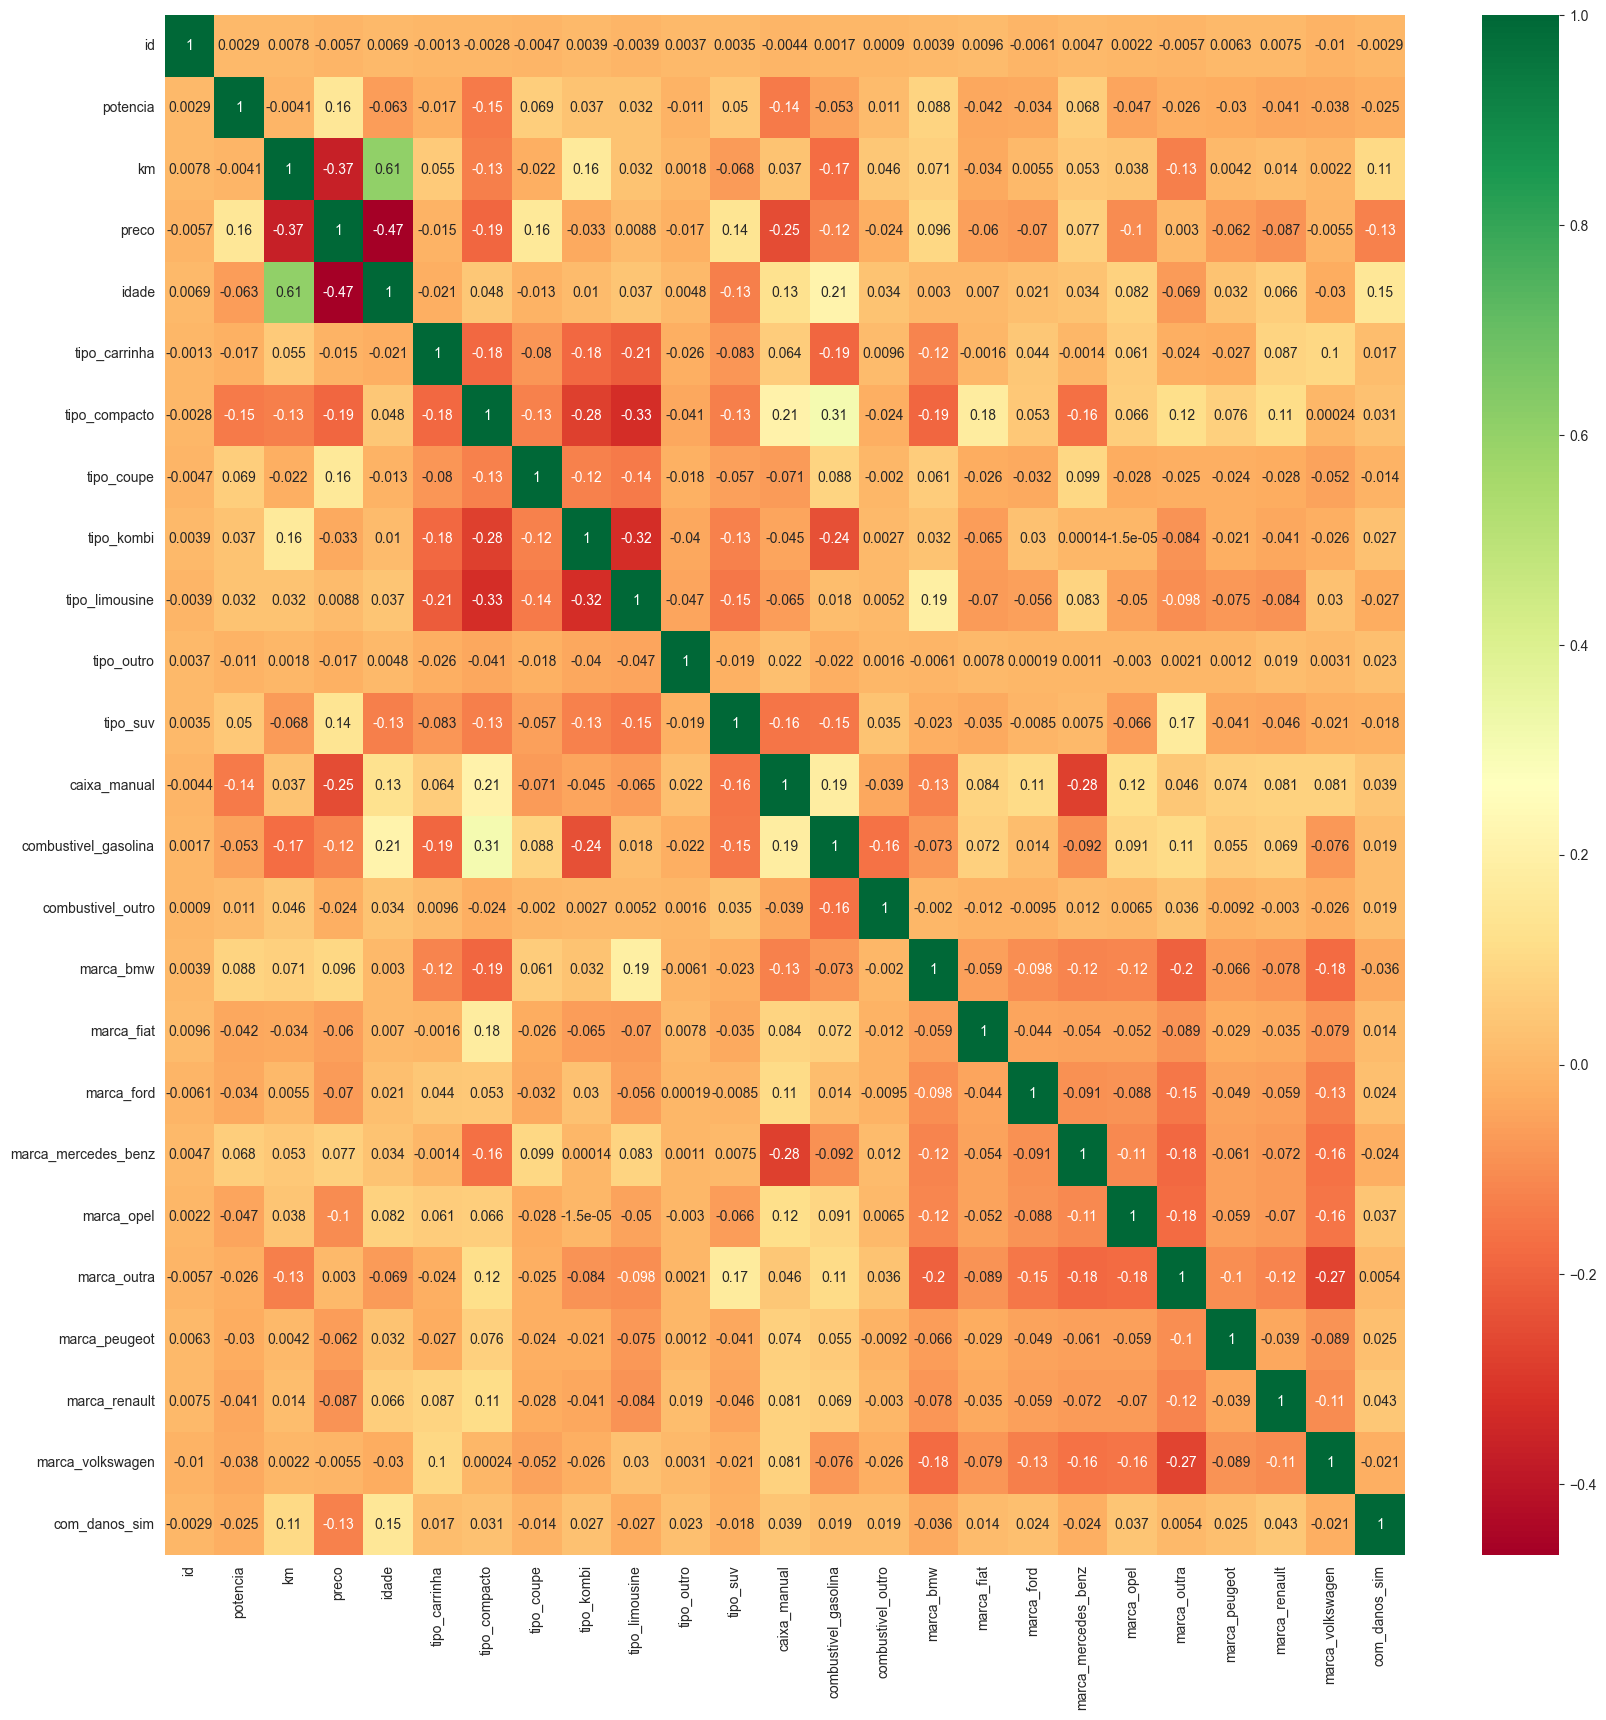

In [18]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map of the corerlation of the features
g=sns.heatmap(data[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")
#annot = true will write the data in each cell. 
#cmap sets the color of the maps

In [19]:
# Prepare the data map the necessary parameters
# Mapping for 'tipo'
'''
tipo_mapping = {'limousine': 0, 'coupe': 1, 'compacto': 2, 'kombi': 3, 'carrinha': 4, 'cabrio': 5, 'suv': 6, 'outro': 7}
data['tipo'] = data['tipo'].map(tipo_mapping)

# Mapping for 'caixa'
caixa_mapping = {'manual': 0, 'automatica': 1}
data['caixa'] = data['caixa'].map(caixa_mapping)

# Mapping for 'com_danos'
com_danos_mapping = {'nao': 0, 'sim': 1}
data['com_danos'] = data['com_danos'].map(com_danos_mapping)

# Mapping for 'combustivel'
combustivel_mapping = {'gasolina': 0, 'diesel': 1, 'outro': 2}
data['combustivel'] = data['combustivel'].map(combustivel_mapping)

# Mapping for 'marca' (assuming 'marca' has too many unique values)
marca_mapping = {marca: i for i, marca in enumerate(data['marca'].unique())}
data['marca'] = data['marca'].map(marca_mapping)'''

"\ntipo_mapping = {'limousine': 0, 'coupe': 1, 'compacto': 2, 'kombi': 3, 'carrinha': 4, 'cabrio': 5, 'suv': 6, 'outro': 7}\ndata['tipo'] = data['tipo'].map(tipo_mapping)\n\n# Mapping for 'caixa'\ncaixa_mapping = {'manual': 0, 'automatica': 1}\ndata['caixa'] = data['caixa'].map(caixa_mapping)\n\n# Mapping for 'com_danos'\ncom_danos_mapping = {'nao': 0, 'sim': 1}\ndata['com_danos'] = data['com_danos'].map(com_danos_mapping)\n\n# Mapping for 'combustivel'\ncombustivel_mapping = {'gasolina': 0, 'diesel': 1, 'outro': 2}\ndata['combustivel'] = data['combustivel'].map(combustivel_mapping)\n\n# Mapping for 'marca' (assuming 'marca' has too many unique values)\nmarca_mapping = {marca: i for i, marca in enumerate(data['marca'].unique())}\ndata['marca'] = data['marca'].map(marca_mapping)"

In [20]:
# Display the preprocessed data
data.describe() 

,id,potencia,km,preco,idade
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,49878.823840,137.546760,121195.808000,7876.264120,17.422400
std,28932.226902,214.565586,41268.626786,11657.351891,4.283129
min,1.000000,3.000000,5000.000000,1.000000,7.000000
25%,24673.750000,90.000000,90900.000000,2389.000000,14.000000
50%,49997.500000,122.000000,150100.000000,5030.000000,18.000000
75%,75016.500000,163.000000,150600.000000,10020.000000,21.000000
max,99998.000000,16312.000000,151000.000000,745060.000000,24.000000


In [21]:
y = data['preco']

In [22]:
# The input and output features preparation
X = data.drop(['preco', 'id'], axis = 1)

In [23]:
X.shape

(25000, 23)

In [24]:
X.head()

,potencia,km,idade,tipo_carrinha,tipo_compacto,tipo_coupe,tipo_kombi,tipo_limousine,tipo_outro,tipo_suv,...,marca_bmw,marca_fiat,marca_ford,marca_mercedes_benz,marca_opel,marca_outra,marca_peugeot,marca_renault,marca_volkswagen,com_danos_sim
0,140,40800,10,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,184,30300,11,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
2,177,150900,15,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,54,150500,18,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,150,40600,9,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [25]:
y.head()

0    14200
1    25840
2     9990
3     3250
4    16939
Name: preco, dtype: int64

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
#in ensemble predictions of several base estimators are built in with a given learning algorithm.
#we used ExtraTreesRegressor
model = ExtraTreesRegressor()
#This class implements a meta estimator that fits a number of randomized decision trees 
#on various sub-samples of the dataset and uses averaging to improve the 
#predictive accuracy and control over-fitting.
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)
#shows the feature importance that contribute to the selling price feature

[3.51270805e-01 1.28350461e-01 2.92698144e-01 2.98082422e-03
 2.74463018e-02 2.71603431e-02 3.85577423e-03 5.89990984e-03
 2.63337827e-04 4.41260388e-03 8.59527696e-02 7.12495615e-03
 4.48736065e-04 7.61879959e-03 4.00051555e-04 4.53123688e-03
 3.86134194e-03 1.67184889e-03 3.39557082e-02 6.04110833e-04
 8.61761426e-04 4.88635479e-03 3.74381966e-03]


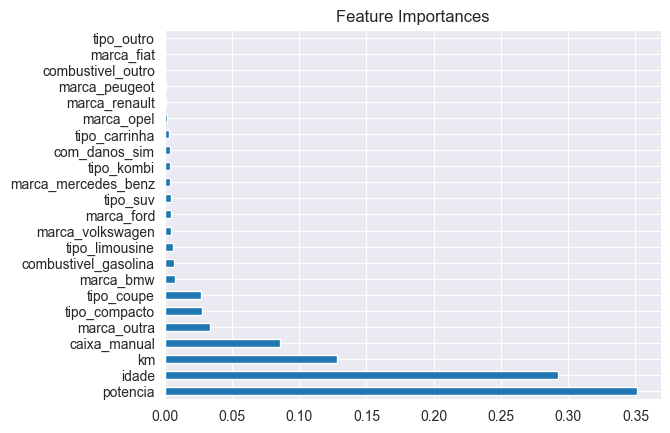

In [28]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [29]:
# Spliting the data into training and testing dataset
from sklearn.model_selection import train_test_split
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#we divide the data into 2 parts :- 80% train and 20% test data 
# and random_state is used to guarantee that same sequence of 
#random numbers are generated each time you run the code. 
#And unless there is some other randomness present in the process, 
#the results produced will be same as always.

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20000, 23) (5000, 23) (20000,) (5000,)


In [31]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
#A random forest regressor is an estimator that fits a number of classifying decision trees 
#on various sub-samples of the dataset and uses averaging to improve the prediction accuracy 
#and slos control over-fitting.

In [74]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 1000, num = 12)]
#n_estimators is a parameter of the random forest regressor which is used to control no of trees in the forest
#so we use 100 200 ....1200 trees for the model
print(n_estimators)

[15, 23, 31, 39, 48, 56, 64, 72, 81, 89, 97, 106, 114, 122, 130, 139, 147, 155, 163, 172, 180, 188, 197, 205, 213, 221, 230, 238, 246, 255, 263, 271, 279, 288, 296, 304, 312, 321, 329, 337, 346, 354, 362, 370, 379, 387, 395, 404, 412, 420, 428, 437, 445, 453, 461, 470, 478, 486, 495, 503, 511, 519, 528, 536, 544, 553, 561, 569, 577, 586, 594, 602, 610, 619, 627, 635, 644, 652, 660, 668, 677, 685, 693, 702, 710, 718, 726, 735, 743, 751, 759, 768, 776, 784, 793, 801, 809, 817, 826, 834, 842, 851, 859, 867, 875, 884, 892, 900, 908, 917, 925, 933, 942, 950, 958, 966, 975, 983, 991, 1000]


In [35]:
#Randomized Search CV
# Number of features to consider at every split
max_features = ['sqrt', 'log2', 0.5] # considering square root, log2 and 50% of features

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [36]:
max_depth

[5, 10, 15, 20, 25, 30]

In [37]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized search on hyper parameters.
#used to select the best parameter for the model

In [38]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [15, 104, 194, 283, 373, 462, 552, 641, 731, 820, 910, 1000], 'max_features': ['sqrt', 'log2', 0.5], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validatio
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 10, verbose=2, random_state=84, n_jobs = 1)

In [40]:
#rf = object of the regressor 
#param_distributions = Dictionary with parameters names as keys and parameters as vlaues 
#scoring = metric that we used to evaluate the performance of the cross-validated model on the test set. 
#we used negative mean squared error.
#cv = 5 fold cross validation
#n_jobs = no of cores to use

In [41]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=820; total time=   7.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=820; total time=   6.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=820; total time=   6.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=820; total time=   6.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=820; total time=   6.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=820; total time=   6.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=820; total time=   6.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, 

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [15, 104, 194, 283, 373,
                                                         462, 552, 641, 731,
                                                         820, 910, 1000]},
                   random_state=84, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
predictions=rf_random.predict(X_test)

In [43]:
predictions1=rf_random.predict(X_train)

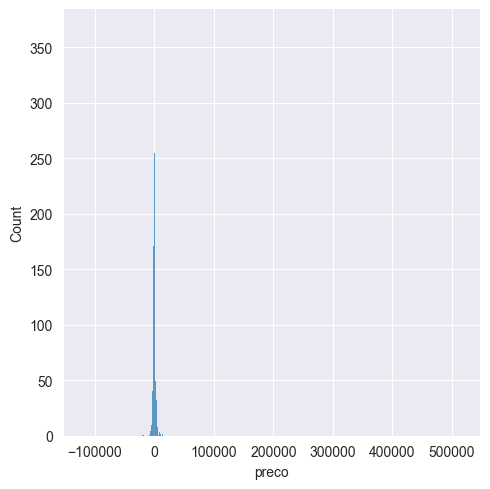

In [44]:
sns.displot(y_test-predictions)

In [45]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

R2 score : 0.6237250826218599


In [46]:
# GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [47]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 15, stop = 100, num = 12)]
#n_estimators is a parameter of the random forest regressor which is used to control no of trees in the forest
#so we use 100 200 ....1200 trees for the model
print(n_estimators)

[15, 22, 30, 38, 45, 53, 61, 69, 76, 84, 92, 100]


In [48]:
#Randomized Search CV
# Number of features to consider at every split
max_features = ['sqrt', 'log2', 0.5] # considering square root, log2 and 50% of features

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [49]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [15, 22, 30, 38, 45, 53, 61, 69, 76, 84, 92, 100], 'max_features': ['sqrt', 'log2', 0.5], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [27]:
# Instantiation of the model
model = RandomForestRegressor(n_estimators = 10, random_state = 84)

In [51]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X, y)  # X and y should be replaced with your data and target variable

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [32]:
# Fitting the model
price_rf = model.fit(X_train, y_train)

In [33]:
# Training model evaluation

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [35]:
# The training r_sq
print(f'The trained r_sq is: %.2f'%price_rf.score(X_train, y_train))

The trained r_sq is: 1.00


In [36]:
y_train_pred = price_rf.predict(X_train)

In [37]:
# The MAE
print('The MAE is: %.2f'%mean_absolute_error(y_train, y_train_pred))

The MAE is: 83.36


In [38]:
# The MSE
print('The MSE is: %.2f'%mean_squared_error(y_train, y_train_pred))

The MSE is: 161507.34


In [39]:
# THE RMSE
import numpy as np
print('The RMSE is: %.2f'%np.sqrt(mean_squared_error(y_train, y_train_pred)))

The RMSE is: 401.88


In [40]:
# The EVS
print('The EVS is: %.2f'%explained_variance_score(y_train, y_train_pred))

The EVS is: 1.00


In [41]:
# Prediction on testing data
y_test_pred = price_rf.predict(X_test)

In [42]:
print(y_test_pred[:100])

[ 2749.2    7608.14   8818.35   5030.    10622.825  1320.82   5446.29
  6041.25   9663.56   1030.     9622.49   2025.2    7258.215  3146.88
  1941.6     950.     1467.2     687.     3398.91   9186.915  8999.
 15466.3    2933.68   3890.    13713.01   1833.95  35950.8   16770.
  9961.45  26372.19  13534.07   9376.41   5082.74  11622.33    899.4
 10729.56   2069.38  12123.64   5340.7   11434.66  26689.98   3288.56
  5703.01  12349.13   1956.59   9933.05  15522.55   2459.56   4373.12
  5585.     1496.45  28092.57  13665.46   1747.615   930.    11301.03
  6878.1    2103.82    899.7    4792.99  10436.91   2921.72   1497.745
  1471.4    7355.5   32548.19   2325.45   1856.7    4585.94   8626.88
  1032.878  4793.3    6115.78   1563.     6775.4    2238.77   1242.87
   526.2   12601.3    7603.29   2227.44   3305.    12802.3   12320.32
  5570.     1884.     4834.28   4373.29  14676.97  10793.84   1710.
  5390.     5038.22   8364.2    5279.12   3362.5    4433.585  5600.31
   860.     1205.85 ]


In [43]:
# The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, y_test_pred))

The testing r_sq is: 0.85


In [44]:
# Or
print('The testing r_sq is: %.2f'% price_rf.score(X_test, y_test))

The testing r_sq is: 0.85


In [45]:
# The metrics

In [46]:
#The MAE
print('The MAE IS: %.2f'%mean_absolute_error(y_test, y_test_pred))

The MAE IS: 1903.14


In [47]:
#The MSE
print('The MSE IS: %.2f'%mean_squared_error(y_test, y_test_pred))

The MSE IS: 28816629.49


In [48]:
# THE RMSE
print('The RMSE IS: %.2f'%np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE IS: 5368.11


In [49]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, y_test_pred))

The EVS is: 0.85


In [50]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


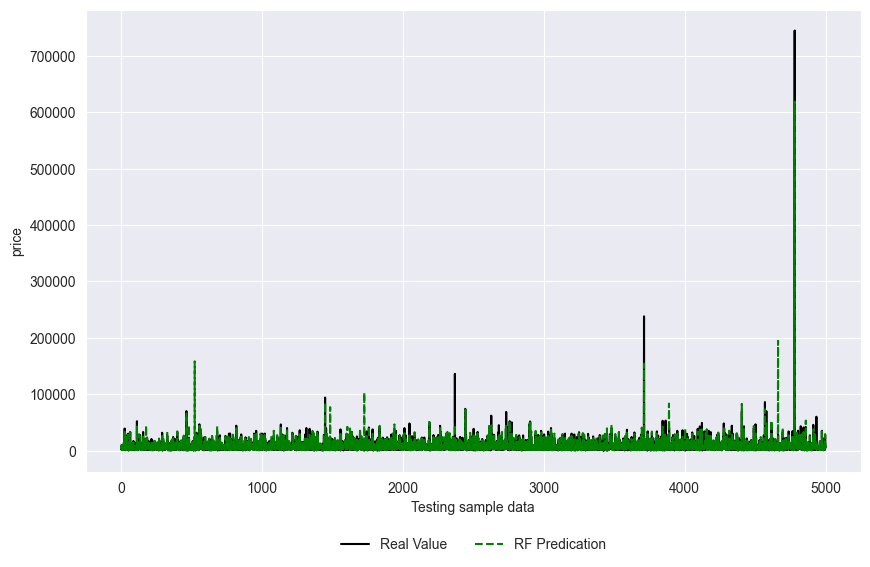

In [51]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
#Ploting
plt.plot(x_ax, y_test, label = 'Real Value', color = 'k', linestyle = '-')
plt.plot(x_ax, y_test_pred, label = 'RF Predication', color = 'green', linestyle = '--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

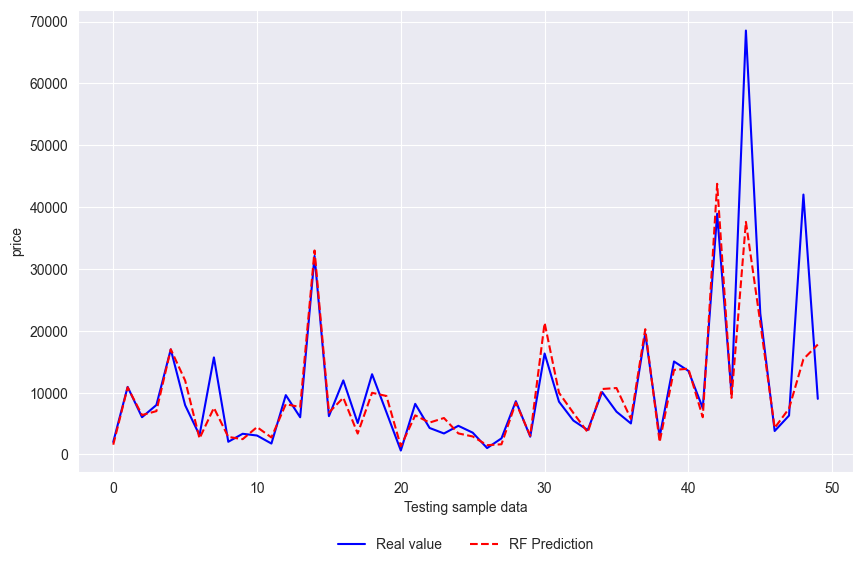

In [75]:
# Plot a more visualized view
import random as rd

# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(0, 50)
# Setting random search plot

st = rd.randint(0, 4550) #start
nd = st + 50 #end

# Plotting
plt.plot(x_ax, y_test[st:nd], label = 'Real value', color = 'blue', linestyle = '-')
plt.plot(x_ax, y_test_pred[st:nd], label = 'RF Prediction', color = 'red', linestyle = '--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

In [76]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [77]:
from yellowbrick.regressor import PredictionError

# For plotting clarity concatenated redundant values
lower_bound = 100
upper_bound = 150000

# Filter X_test and y_test based on the desired range
indices_within_range = np.where((y_test >= lower_bound) & (y_test <= upper_bound))[0]
X_test_within_range = X_test.iloc[indices_within_range]
y_test_within_range = y_test.iloc[indices_within_range]

# Create PredictionError visualizer with the filtered data
visualizer = PredictionError(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test_within_range, y_test_within_range)
visualizer.poof()

ModuleNotFoundError: No module named 'distutils'

In [57]:
from yellowbrick.regressor import PredictionError
import matplotlib.pyplot as plt
import numpy as np

# Assuming your desired lower and upper bounds are 100 and 150000, respectively
lower_bound = 100
upper_bound = 150000

# Filter X_test and y_test based on the desired range
indices_within_range = np.where((y_test >= lower_bound) & (y_test <= upper_bound))[0]
X_test_within_range = X_test.iloc[indices_within_range]
y_test_within_range = y_test.iloc[indices_within_range]

# Create PredictionError visualizer with the filtered data
visualizer = PredictionError(price_rf)
visualizer.fit(X_train, y_train)

# Predict on the filtered test data
y_pred_within_range = price_rf.predict(X_test_within_range)

# Filter predicted values within the specified range
indices_y_pred_within_range = np.where((y_pred_within_range >= lower_bound) & (y_pred_within_range <= upper_bound))[0]
y_test_within_range_filtered = y_test_within_range.iloc[indices_y_pred_within_range]
y_pred_within_range_filtered = y_pred_within_range[indices_y_pred_within_range]

# Fit the visualizer on the filtered test data and predicted values within the range
visualizer.score(X_test_within_range, y_test_within_range)
visualizer.poof()

# Set the y-axis limits to display only the specified range for both y and y_hat
plt.ylim(lower_bound, upper_bound)
plt.scatter(y_test_within_range_filtered, y_pred_within_range_filtered, edgecolors=(0, 0, 0))
plt.plot([lower_bound, upper_bound], [lower_bound, upper_bound], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error')
plt.show()


ModuleNotFoundError: No module named 'distutils'

In [58]:
# Plotting Residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

ModuleNotFoundError: No module named 'distutils'

In [60]:
# The k-fold CV
from sklearn.model_selection import cross_val_score

In [61]:
seed = 5 #set to fixed value to check same result

In [62]:
# Training model CV
score_train = cross_val_score(price_rf, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)

In [63]:
score_train

array([-1.62602483e+07, -1.04321693e+07, -2.09417294e+07, -2.30014082e+07,
       -1.50254022e+08, -1.36956501e+07, -4.75452316e+07, -3.66595074e+07,
       -3.83381662e+07, -1.58251894e+07])

In [64]:
# The mean score
print(score_train.mean())

-37295332.19686712


In [65]:
# The absolute mean score
print(abs(score_train.mean()))

37295332.19686712


In [66]:
# The testing model CV
score_test = cross_val_score(price_rf, X_test, y_test, scoring='neg_mean_squared_error', cv = 10)

In [67]:
score_test

array([-1.79762419e+07, -8.75333338e+07, -1.50423700e+07, -2.27075951e+08,
       -5.40671272e+07, -1.36109976e+07, -9.42253076e+06, -5.77765413e+07,
       -2.45821484e+07, -9.02477372e+08])

In [68]:
# The mean score
print(score_train.mean())

-37295332.19686712


In [69]:
# The absolute mean score
print(abs(score_train.mean()))

37295332.19686712


In [70]:
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [71]:
f_list = list(X.columns)
f_importance = pd.Series(price_rf.feature_importances_, index = f_list).sort_values(ascending=False)

In [72]:
print(f_importance)

potencia                0.331857
idade                   0.305063
km                      0.135084
caixa_manual            0.082647
tipo_compacto           0.031818
marca_outra             0.029196
tipo_coupe              0.025562
marca_bmw               0.009929
combustivel_gasolina    0.008056
tipo_limousine          0.006956
marca_volkswagen        0.005684
tipo_suv                0.005382
marca_mercedes_benz     0.004822
tipo_kombi              0.004365
com_danos_sim           0.004355
tipo_carrinha           0.003158
marca_opel              0.001700
marca_ford              0.001685
marca_renault           0.000932
marca_peugeot           0.000590
combustivel_outro       0.000513
marca_fiat              0.000395
tipo_outro              0.000252
dtype: float64


In [73]:

# Data preprocessing
# You may need to perform additional data preprocessing steps based on your dataset

# Split the dataset into features and target variable
X = data.drop('preco', axis=1)  # Features
y = data['preco']  # Target variable

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Fit the model
model.fit(X, y)

# Use the trained model to predict prices for just_features dataset
predicted_prices = model.predict(just_features)

# Create a DataFrame with predicted prices and IDs
predicted_df = pd.DataFrame({'id': just_features['id'], 'preco': predicted_prices})

# Save the predicted prices to a CSV file
predicted_df.to_csv('precos_estimados.csv', index=False)

# Evaluate the model (optional)
# Split the data for evaluation (if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


NameError: name 'just_features' is not defined